In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


 # 1 探索数据
- 数据类型 df.dtypes
- 数值型变量的分布  dy.describe()
- 分类变量的分布 Series.value_counts()

In [8]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
df.describe()
# 看一下数据分布正不正常，比如age的最小值不可能是负数
# 有什么用呢？ 如果你对业务了解了，求一个比例。 你就知道每个feature的正常值大概在一个什么样的范围

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# 查看一个feature（非数值）有什么东西，正不正常
df.job.value_counts()
# 比如下面的admin很多，这个说明什么？要和业务结合起来

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

# 2 数据处理
Missing value
- 发现missing value    isnull
- 替换    fillna
- 删除    dropna

分类变量
- One-hot-encode	   get_dummies

这个要一列一列的看

In [11]:
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


但是这样太多了，没法看。我们用求和的方法来简化这个步骤

In [13]:
df.isnull().sum()
# false 是 0， true的话是1.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.fillna(-1)  # -1  -999

这个数据集里虽然没有，但是实际的业务当中肯定是有missing value的。最好的方法使用fillna来替换这些missing value.
>但是用什么来替换呢？不会造成人为地改变数据吗？

这里有个经验，用-1或-999来替换。就是说用一个无意义的值去替换。这样模型在算的时候就知道这是一个missing value（呃，怎么做到的）。总之，不会影响模型的准确率。用0或整数的话模型的准确率一定会受到影响。

接下来是删除的dropna。但是删除missing value是一行一行删除的。所以不要轻易使用。真要删的话仔细考虑，不怎么推荐。


对于非数值的feature，用onehotencode

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [22]:
numDF = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'])

In [23]:
numDF.dtypes

age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
y                        object
job_admin.              float64
job_blue-collar         float64
job_entrepreneur        float64
job_housemaid           float64
job_management          float64
job_retired             float64
job_self-employed       float64
job_services            float64
job_student             float64
job_technician          float64
job_unemployed          float64
job_unknown             float64
marital_divorced        float64
marital_married         float64
marital_single          float64
marital_unknown         float64
education_basic.4y      float64
education_basic.6y      float64
education_basic.9y      float64
                         ...   
educatio

# 3 数据转换

数据平滑
- 数据量纲需要保证一致
- 标准化
- 归一化

简单转换

特征选择
- 分类模型使用  chi2  （数据不能有负数）
- 回归模型使用   f_regression

# 4 数据建模
- 模型选择
	
    逻辑斯提回归
    
- 传递参数
	
    `clf  =  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True,intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr',verbose=0, warm_start=False, n_jobs=1)`
    
- 训练模型
	
    `clf.fit(xtrain,ytrain)`
    
- 预测数据
	
    `clf.predict(xtest)`


In [28]:
# 先把y的yes和no变为0，1
# 并把y这一列更名为target
numDF.loc[numDF['y'] == 'yes', 'target'] = 1
numDF.loc[numDF['y'] == 'no', 'target'] = 0

In [30]:
numDF.target.value_counts()

0.0    36548
1.0     4640
Name: target, dtype: int64

In [32]:
# 在建模之前，我们需要将数据集划分为2分，训练集和测试集
from sklearn.model_selection import train_test_split

In [33]:
# It's slightly confusing, but axis=0 operates on rows, axis=1 operates on columns.
x_train, x_test, y_train, y_test = train_test_split(numDF.drop(['y', 'target'], axis=1), 
                                                   numDF['target'], test_size=0.3) 

In [34]:
x_train.shape

(28831, 63)

In [35]:
x_test.shape

(12357, 63)

In [36]:
# train
from sklearn.linear_model import LogisticRegression 

In [64]:
clf = LogisticRegression()

In [65]:
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

现在模型已经训练好了，如何评估这个模型的好坏呢。

sklearn在几乎每一个模型上都有一个叫score的method，用来做评价指标。导入测试集即可

In [66]:
clf.score(x_test, y_test)

0.90661163712875292

上面就是我们的得分。在训练集上训练，在测试集上预测的得分。

但是一个模型的参数那么多，我们要怎么设置呢。我们因为还没有调参，所以模型的准确率还可以提高. 而调参的方法就是gridsearch

# 5 参数指定-交叉验证

`class sklearn.grid_search.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise')`
- 输入模型
- 输入可能的全部参数以及对应的值，使用字典的形式
- 设置交叉验证的折数: 如果设为5折，就是4份训练，1份测试，进行5次。
- 设置评价指标


In [56]:
from sklearn.grid_search import GridSearchCV

In [57]:
param = {'C':[0.01, 0.05, 0.1, 1], 'max_iter':[100, 200, 300]}

In [59]:
gsc = GridSearchCV(clf, param, scoring='accuracy', cv=5, verbose=1) # verbose是打印结果

In [60]:
gsc.param_grid

{'C': [0.01, 0.05, 0.1, 1], 'max_iter': [100, 200, 300]}

In [61]:
gsc.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   22.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.05, 0.1, 1], 'max_iter': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [67]:
# 训练完后查看每一组参数组合的分数
gsc.grid_scores_
# 下面的准确率是5折平均后的值，所以可信度很高。
# 而上面的clf.score(xtest, yest)只是一次的平均值

[mean: 0.91145, std: 0.00228, params: {'C': 0.01, 'max_iter': 100},
 mean: 0.91145, std: 0.00228, params: {'C': 0.01, 'max_iter': 200},
 mean: 0.91145, std: 0.00228, params: {'C': 0.01, 'max_iter': 300},
 mean: 0.91100, std: 0.00195, params: {'C': 0.05, 'max_iter': 100},
 mean: 0.91100, std: 0.00195, params: {'C': 0.05, 'max_iter': 200},
 mean: 0.91100, std: 0.00195, params: {'C': 0.05, 'max_iter': 300},
 mean: 0.91072, std: 0.00227, params: {'C': 0.1, 'max_iter': 100},
 mean: 0.91072, std: 0.00227, params: {'C': 0.1, 'max_iter': 200},
 mean: 0.91072, std: 0.00227, params: {'C': 0.1, 'max_iter': 300},
 mean: 0.91062, std: 0.00220, params: {'C': 1, 'max_iter': 100},
 mean: 0.91062, std: 0.00220, params: {'C': 1, 'max_iter': 200},
 mean: 0.91062, std: 0.00220, params: {'C': 1, 'max_iter': 300}]

In [69]:
gsc.best_params_

{'C': 0.01, 'max_iter': 100}

这里需要注意的是准确率不是一个好的指标，比如对于不平衡数据。所以几乎不用.常用的是precision, recall, f1 score.

# 6 模型评估

In [70]:
# sklearn 提供了一个precision，recall图
from sklearn.metrics import precision_recall_curve

In [71]:
# 得到针对测试集，预测的概率值
prob = gsc.predict_proba(x_test)

In [72]:
# prob是一个二维的数组，第一列是预测为0的概率，第二列是预测为1的概率
prob

array([[ 0.98611128,  0.01388872],
       [ 0.98791997,  0.01208003],
       [ 0.99814644,  0.00185356],
       ..., 
       [ 0.97382491,  0.02617509],
       [ 0.9491234 ,  0.0508766 ],
       [ 0.95023035,  0.04976965]])

In [75]:
# 这个图非常重要
# threshold 默认是0.5
precision, recall, thre = precision_recall_curve(y_test, prob[:,1])

In [77]:
# 画出precision和recall的图
import matplotlib.pyplot as plt
%matplotlib inline

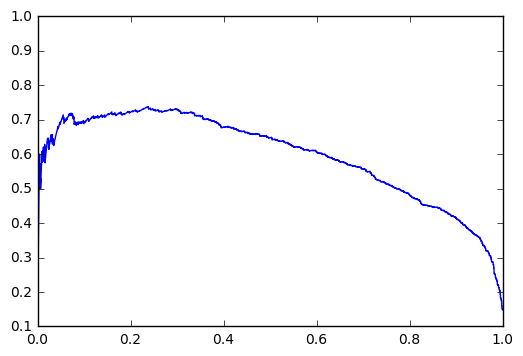

In [80]:
plt.plot(recall, precision)
# precision 和 recall 永远是制衡的

In [83]:
# classification_report可以用来查看模型的效果
from sklearn.metrics import classification_report

In [88]:
print(gsc.predict(x_test))
# gsc是已经包含了模型（clf）的gridsearch, 所以不用再用clf.predict, 直接用gsc.predict也是同样的效果

[ 0.  0.  0. ...,  0.  0.  0.]


In [89]:
print(classification_report(y_test, gsc.predict(x_test)))
# support 是指预测的样本数量

             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95     10901
        1.0       0.69      0.39      0.50      1456

avg / total       0.90      0.91      0.90     12357



In [82]:

help(classification_report)

Help on function classification_report in module sklearn.metrics.classification:

classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
    Build a text report showing the main classification metrics
    
    Read more in the :ref:`User Guide <classification_report>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_labels]
        Optional list of label indices to include in the report.
    
    target_names : list of strings
        Optional display names matching the labels (same order).
    
    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.
    
    digits : int
        Number of digits for formatting output floating point values
    
   

In [90]:
# 再用一个随机森林做个例子。现在基本都不用决策树
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf1 = RandomForestClassifier()

In [93]:
clf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [94]:
clf1.score(x_test, y_test)

0.90369830865096701

# 小结

- 特征工程是最为核心的，特征决定了你的准确率上线，而不同的模型只是无限逼近与这个上限
- Scikit-learn所有模型的接口都是一致的. Fit – predict – score – evaluate
- 集成算法是当前最火的模型，原因就是准确率高
- 涉及到距离计算或者梯度下降算法的模型都需要对数据进行归一化或者标准化


# 7 对数据进行标准化


In [41]:
from sklearn.preprocessing import StandardScaler

注意事项，一定要在训练集上标准化，然后把训练集上标准化的数据，应该用到测试集上。绝对不可以分开标准化。

In [42]:
std = StandardScaler()

In [45]:
std.fit(x_train) #一定要在训练集上标准化

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
x_train_std = std.transform(x_train)  # 然后把训练集上标准化的数据，应该用测试集
x_test_std = std.transform(x_test)

In [47]:
# 查看标准化后的测试结果
clf2 = LogisticRegression()

In [48]:
clf2.fit(x_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
clf2.score(x_test_std, y_test)

0.90847293032289389

准确率稍有上升，但是看不出来。我们用report来查看具体的情况。
clf2和gsc都是用的LogisticRegression，区别只是数据集是否标准化而已。

可以发现，标准化下，recall上升了，虽然precision下降，但是整体的f1还是上升了。所以要记住这句话：**涉及到距离计算或者梯度下降算法的模型都需要对数据进行归一化或者标准化**


In [54]:
print(classification_report(y_test, clf2.predict(x_test_std)))

             precision    recall  f1-score   support

        0.0       0.93      0.97      0.95     10901
        1.0       0.68      0.42      0.52      1456

avg / total       0.90      0.91      0.90     12357



In [96]:
print(classification_report(y_test, gsc.predict(x_test)))

             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95     10901
        1.0       0.69      0.39      0.50      1456

avg / total       0.90      0.91      0.90     12357

